In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Anime faces 
# puts images into colab
# following code must be ran once at the beginning of each new runtime

# Source: https://www.kaggle.com/general/74235
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download splcher/animefacedataset --unzip --force

import shutil
!mkdir anime_faces
shutil.move("/content/images", "/content/anime_faces") 

Saving kaggle.json to kaggle.json
100% 394M/395M [00:10<00:00, 43.4MB/s]
100% 395M/395M [00:10<00:00, 40.2MB/s]


'/content/anime_faces/images'

In [3]:
# Human faces
# puts images into colab
# following code must be ran once at the beginning of each new runtime

# Source: https://colab.research.google.com/drive/1ytjiIM_sZohV1I6p-9Cov6DtJjidJmcq#scrollTo=BALJJFbe3hNb
import zipfile

!mkdir human_faces && wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip 
with zipfile.ZipFile("celeba.zip","r") as zip_ref:
  zip_ref.extractall("human_faces/")

--2023-03-13 04:15:13--  https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.192.56
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.192.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1443490838 (1.3G) [application/zip]
Saving to: ‘celeba.zip’

celeba.zip          100%[===================>]   1.34G  13.4MB/s    in 2m 35s  

2023-03-13 04:17:48 (8.90 MB/s) - ‘celeba.zip’ saved [1443490838/1443490838]



In [ ]:
########## code below is the standard "getting data and splitting into train/validation/testing" code 

In [4]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt # for plotting
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms

In [20]:
# Anime Images dataloader
def get_dataloader_anime(batch_size):
  transform = transforms.Compose(
          [transforms.ToTensor(), transforms.Resize(224), 
          transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# update directory below to your directory!
  dataset = torchvision.datasets.ImageFolder("./anime_faces",transform=transform)

  # split data into training, validation, testing 
  indices = list(range(len(dataset)))
  np.random.seed(1)
  np.random.shuffle(indices)
  split1 = int(len(indices) * 0.7) # split at 70% 
  split2 = int(len(indices) * 0.2) # split at 20%
  # train:validate:test = 7:2:1

  train_indices, val_indices, test_indices = indices[:split1], indices[split1:split2], indices[split2:]
  train_sampler = SubsetRandomSampler(train_indices)
  val_sampler = SubsetRandomSampler(val_indices)
  test_sampler = SubsetRandomSampler(test_indices)

  training_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                num_workers=2, sampler=train_sampler)
  validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                num_workers=2, sampler=val_sampler)
  testing_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                num_workers=2, sampler=test_sampler)

  return training_loader, validation_loader, testing_loader

In [21]:
# Human Images dataloader
def get_dataloader_human(batch_size):
  transform = transforms.Compose(
          [transforms.ToTensor(), transforms.Resize(224), 
          transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

  # load the dataset 
  dataset = datasets.ImageFolder('./human_faces', transform=transform)
  

  # split data into training, validation, testing 
  indices = list(range(len(dataset)))
  np.random.seed(1)
  np.random.shuffle(indices)
  split1 = int(len(indices) * 0.7) # split at 70% 
  split2 = int(len(indices) * 0.2) # split at 20%
  # train:validate:test = 7:2:1

  train_indices, val_indices, test_indices = indices[:split1], indices[split1:split2], indices[split2:]
  train_sampler = SubsetRandomSampler(train_indices)
  val_sampler = SubsetRandomSampler(val_indices)
  test_sampler = SubsetRandomSampler(test_indices)

  training_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                num_workers=2, sampler=train_sampler)
  validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                num_workers=2, sampler=val_sampler)
  testing_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                num_workers=2, sampler=test_sampler)

  return training_loader, validation_loader, testing_loader

In [22]:
batch_size = 1000
# Anime images dataloader 
training_loader_anime, validation_loader_anime, testing_loader_anime = get_dataloader_anime(batch_size)

# Human images dataloader
training_loader_human, validation_loader_human, testing_loader_human = get_dataloader_human(batch_size)

In [8]:
def show(img,renorm=False,nrow=8,interpolation='bicubic'):
  if renorm:
    img = img/2 + 0.5
  img_grid = torchvision.utils.make_grid(img,nrow=nrow).numpy()
  plt.figure()
  plt.imshow(np.transpose(img_grid, (1,2,0)), interpolation=interpolation)
  plt.axis('off')
  plt.show()

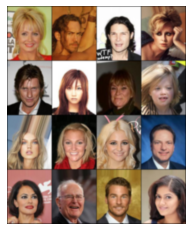

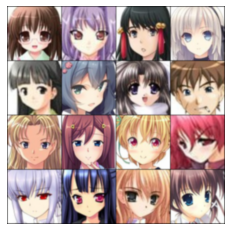

In [24]:
batch, _ = next(iter(training_loader_human))
show(batch[0:16], renorm = True, nrow=4)

batch, _ = next(iter(training_loader_anime))
show(batch[0:16], renorm = True, nrow=4)